In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sys
sys.path.append('C:/Users/Gabzer/Desktop/Mestrado/Neural_Networks/')
from Perceptron import Perceptron

In [2]:
#Métodos para o Backpropagation
def erroTotal(results, saidas):
    result = 0
    for i in range(len(results)):
        result += 1 / 2 * (saidas[i] - results[i]) ** 2
    return result

#servem para a última camada
#derivada
def derivada(saida_desejada, funcao_ativacao1, funcao_ativacao2):
    return -(saida_desejada - funcao_ativacao1) * funcao_ativacao1 * (1 - funcao_ativacao1) * funcao_ativacao2
#valor t + 1 do peso
def novoPeso(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso

#outras camadas
def derivada2(saida_desejada, funcao_ativacao):
    return -(saida_desejada - funcao_ativacao) * funcao_ativacao * (1 - funcao_ativacao)
    
def derivada3(peso, derivada, funcao_ativacao):
    return (peso[0] * derivada[0] + peso[1] * derivada[1]) * funcao_ativacao * (1 - funcao_ativacao)

def novoPeso2(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso * saida_desejada

In [32]:
epocas = 100
count = 0
saidas = [0.01, 0.99]     # y1 e y2
pesos = [[0.15, 0.2],     # w1 e w2
        [0.25, 0.3],      # w3 e w4
        [0.4, 0.45],      # w5 e w6
        [0.5, 0.55]]      # w7 e w8
listE_total = []
listCount = []

while count < epocas:
    
############################################################################################################################
###                                                   CAMADA 1                                                           ###
############################################################################################################################
    #Perceptron H1
    entradas = [0.05, 0.1]     # x1 e x2
    bias = 0.35                # layer1
    perceptron_h1 = Perceptron(entradas, pesos[0], bias)    
    #Perceptron H2
    entradas = [0.05, 0.1]     # x1 e x2
    bias = 0.35                # layer1
    perceptron_h2 = Perceptron(entradas, pesos[1], bias)    
    #Resultado dos Somatórios
    uh1 = perceptron_h1.somatorio()
    uh2 = perceptron_h2.somatorio()    
    #Resultado das funções de ativação
    h1 = perceptron_h1.sigmoide(uh1)
    h2 = perceptron_h2.sigmoide(uh2)    
############################################################################################################################
###                                                   CAMADA 2                                                           ###
############################################################################################################################
    #Perceptron O1
    entradas = [h1, h2]
    bias = 0.6                 # layer2
    perceptron_o1 = Perceptron(entradas, pesos[2], bias)    
    #Perceptron O2
    entradas = [h1, h2]
    bias = 0.6                 # layer2
    perceptron_o2 = Perceptron(entradas, pesos[3], bias)    
    #Resultado dos Somatórios
    uo1 = perceptron_o1.somatorio()
    uo2 = perceptron_o2.somatorio()    
    #Resultado das funções de ativação
    o1 = perceptron_o1.sigmoide(uo1)
    o2 = perceptron_o2.sigmoide(uo2)    
    ###################################################################
    #finaliza o loop se o resultado da sigmoide é = as saídas desejadas
    if o1 == saidas[0] and o2 == saidas[1]:
        print('Resolvido!')
        break
    else:
        print('Resultado:' + str(o1) + ' e ' + str(o2) + 'Uops... Reajustar')
    ###################################################################    
    results = [o1, o2]
    E_total = erroTotal(results, saidas)
    print('Erro total da rede: ' + str(E_total))    
    
####################################################### CORRIGINDO #########################################################
    ###Camada 2###
    #calcula a derivada de w5
    d_w5 = derivada(0.01, o1, h1)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w5
    w5_novo = novoPeso(perceptron_o1.pesos[0], taxa_aprendizado, d_w5)
    
    #calcula a derivada de w6
    d_w6 = derivada(0.01, o1, h2)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w6
    w6_novo = novoPeso(perceptron_o1.pesos[1], taxa_aprendizado, d_w6)
    
    #calcula a derivada de w7
    d_w7 = derivada(0.99, o2, h1)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w7
    w7_novo = novoPeso(perceptron_o2.pesos[0], taxa_aprendizado, d_w7)
    
    #calcula a derivada de w8
    d_w8 = derivada(0.99, o2, 0.05)
    taxa_aprendizado = 0.5
    #calcula o valor ajustado de w8
    w8_novo = novoPeso(perceptron_o2.pesos[1], taxa_aprendizado, d_w8)
    
    
    ###Camada 1###
    #d_o1 = -(y1 - go1) * go1 * (1 - go1)
    d_o1 = -(saidas[0] - o1) * o1 * (1 - o1)
    
    #d_h1 = (w5 * d_o1 + w2 * d_o1) * gh1 * (1 - gh1)
    d_h1 = (perceptron_o1.pesos[1] * d_o1 + perceptron_h1.pesos[1] * d_o1) * h1 * (1 - h1)
    
    w1_novo = perceptron_h1.pesos[0] - d_h1 * saidas[0]
    
    #w2(t + 1) = w2(t) - d_h1 * y1
    w2_novo = perceptron_h1.pesos[1] - d_h1 * saidas[0]
    
    #d_o2 = -(y2 - go2) * go2 * (1 - go2)
    d_o2 = -(saidas[1] - o2) * o2 * (1 - o2)
    
    #d_h2 = (w6 * d_o1 + w8 * d_o2) * gh2 * (1 - gh2)
    d_h2 = (perceptron_o1.pesos[1] * d_o1 + perceptron_o2.pesos[1] * d_o2) * h2 * (1 - h2)
    
    #w3(t + 1) = w3(t) - d_h2 * y2
    w3_novo = perceptron_h2.pesos[0] - d_h2 * saidas[1]
    
    #w4(t + 1) = w4(t) - d_h2 * y2
    w4_novo = perceptron_h2.pesos[1] - d_h2 * saidas[1]
    
    
    #os pesos sinápticos reajustados são postos em seus lugares para a nova iteração
    pesos = [[w1_novo, w2_novo],     # w1 e w2
            [w3_novo, w4_novo],      # w3 e w4
            [w5_novo, w6_novo],      # w5 e w6
            [w7_novo, w8_novo]]      # w7 e w8
    
    print(count)
    count += 1
    print('====================================================================')
    
    
    listE_total.append(E_total)
    listCount.append(count)

Resultado:0.7513650695523157 e 0.7729284653214625Uops... Reajustar
Erro total da rede: 0.2983711087600027
0
Resultado:0.742061826218241 e 0.7741674862336226Uops... Reajustar
Erro total da rede: 0.29124909570234975
1
Resultado:0.7324337830322526 e 0.775393522502123Uops... Reajustar
Erro total da rede: 0.2839832555251693
2
Resultado:0.722488357021748 e 0.7766070762897396Uops... Reajustar
Erro total da rede: 0.27658809939058143
3
Resultado:0.7122360099404723 e 0.777808622131537Uops... Reajustar
Erro total da rede: 0.26908029724941596
4
Resultado:0.7016903801465391 e 0.7789986034700868Uops... Reajustar
Erro total da rede: 0.2614785856624187
5
Resultado:0.6908683473910429 e 0.7801774293425067Uops... Reajustar
Erro total da rede: 0.2538036088181643
6
Resultado:0.6797900191634729 e 0.7813454713645028Uops... Reajustar
Erro total da rede: 0.24607769104555344
7
Resultado:0.6684786298788068 e 0.7825030611609451Uops... Reajustar
Erro total da rede: 0.23832454281732454
8
Resultado:0.656960347885797

In [35]:
listE_total

[0.2983711087600027,
 0.29124909570234975,
 0.2839832555251693,
 0.27658809939058143,
 0.26908029724941596,
 0.2614785856624187,
 0.2538036088181643,
 0.24607769104555344,
 0.23832454281732454,
 0.23056890633964083,
 0.22283615098345425,
 0.2151518326345132,
 0.20754123410464317,
 0.20002890568679776,
 0.19263822548540488,
 0.18539099820023,
 0.17830710865292204,
 0.1714042427599602,
 0.16469768425105238,
 0.15820019066529428,
 0.15192194749726565,
 0.14587059522660295,
 0.1400513206584604,
 0.1344670017083689,
 0.1291183935286091,
 0.12400434362269563,
 0.11912202417257489,
 0.11446717100323711,
 0.11003432021101715,
 0.10581703527824289,
 0.10180811931419395,
 0.09799980876899714,
 0.09438394647547199,
 0.09095213313630046,
 0.0876958573750807,
 0.08460660521875388,
 0.08167595040025571,
 0.0788956271974182,
 0.07625758769361038,
 0.07375404539305375,
 0.0713775070815779,
 0.06912079471960283,
 0.06697705901111706,
 0.06493978612819931,
 0.06300279889861227,
 0.06116025359376177,
 0.

<function matplotlib.pyplot.show>

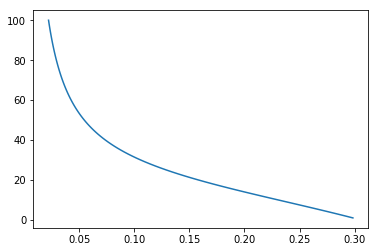

In [34]:
plt.plot(listE_total, listCount)
plt.show

In [31]:
list = []
for i in range(100):
    list.append(i)
print(list)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [2]:
############################################################################################################################
###                                                   CAMADA 1                                                           ###
############################################################################################################################

In [3]:
#Perceptron H1
entradas = [0.05, 0.1]     # x1 e x2
bias = 0.35                # layer1
pesos = [0.15, 0.2]        # w1 e w2

perceptron_h1 = Perceptron(entradas, pesos, bias)

In [4]:
#Perceptron H2
entradas = [0.05, 0.1]     # x1 e x2
bias = 0.35                # layer1
pesos = [0.25, 0.3]        # w3 e w4

perceptron_h2 = Perceptron(entradas, pesos, bias)

In [5]:
#Resultado dos Somatórios
uh1 = perceptron_h1.somatorio()
uh2 = perceptron_h2.somatorio()
print(uh1)
print(uh2)

0.3775
0.39249999999999996


In [6]:
#Resultado das funções de ativação
h1 = perceptron_h1.sigmoide(uh1)
h2 = perceptron_h2.sigmoide(uh2)
print(h1)
print(h2)

0.5932699921071872
0.596884378259767


In [7]:
############################################################################################################################
###                                                   CAMADA 2                                                           ###
############################################################################################################################

In [8]:
#Perceptron O1
entradas = [h1, h2]
bias = 0.6                 # layer2
pesos = [0.4, 0.45]        # w5 e w6

perceptron_o1 = Perceptron(entradas, pesos, bias)

In [9]:
#Perceptron O2
entradas = [h1, h2]
bias = 0.6                 # layer2
pesos = [0.5, 0.55]        # w7 e w8

perceptron_o2 = Perceptron(entradas, pesos, bias)

In [10]:
#Resultado dos Somatórios
uo1 = perceptron_o1.somatorio()
uo2 = perceptron_o2.somatorio()
print(uo1)
print(uo2)

1.1059059670597702
1.2249214040964653


In [11]:
#Resultado das funções de ativação
o1 = perceptron_o1.sigmoide(uo1)
o2 = perceptron_o2.sigmoide(uo2)
print(o1)
print(o2)

0.7513650695523157
0.7729284653214625


In [12]:
saidas = [0.01, 0.99]     # y1 e y2
results = [o1, o2]

In [13]:
#Métodos para o Backpropagation
def erroTotal(results, saidas):
    result = 0
    for i in range(len(results)):
        result += 1 / 2 * (saidas[i] - results[i]) ** 2
    return result

#servem para a última camada
#derivada
def derivada(saida_desejada, funcao_ativacao1, funcao_ativacao2):
    return -(saida_desejada - funcao_ativacao1) * funcao_ativacao1 * (1 - funcao_ativacao1) * funcao_ativacao2
#valor t + 1 do peso
def novoPeso(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso

#outras camadas
def derivada2(saida_desejada, funcao_ativacao):
    return -(saida_desejada - funcao_ativacao) * funcao_ativacao * (1 - funcao_ativacao)
    
def derivada3(peso, derivada, funcao_ativacao):
    return (peso[0] * derivada[0] + peso[1] * derivada[1]) * funcao_ativacao * (1 - funcao_ativacao)

def novoPeso2(peso_atual, taxa_aprendizado, d_peso):
    return peso_atual - taxa_aprendizado * d_peso * saida_desejada

In [14]:
E_total = erroTotal(results, saidas)
print(E_total)

0.2983711087600027


In [15]:
###########################################            CORRIGINDO            ##############################################

In [16]:
###Camada 2###

In [17]:
#calcula a derivada de w5
d_w5 = derivada(0.01, o1, h1)
print(d_w5)
taxa_aprendizado = 0.5
#calcula o valor ajustado de w5
w5_novo = novoPeso(perceptron_o1.pesos[0], taxa_aprendizado, d_w5)
print(w5_novo)

0.08216704056423077
0.35891647971788465


In [18]:
#calcula a derivada de w6
d_w6 = derivada(0.01, o1, h2)
print(d_w6)
taxa_aprendizado = 0.5
#calcula o valor ajustado de w6
w6_novo = novoPeso(perceptron_o1.pesos[1], taxa_aprendizado, d_w6)
print(w6_novo)

0.08266762784753325
0.4086661860762334


In [19]:
#calcula a derivada de w7
d_w7 = derivada(0.99, o2, h1)
print(d_w7)
taxa_aprendizado = 0.5
#calcula o valor ajustado de w7
w7_novo = novoPeso(perceptron_o2.pesos[0], taxa_aprendizado, d_w7)
print(w7_novo)

-0.02260254047747507
0.5113012702387375


In [20]:
#calcula a derivada de w8
d_w8 = derivada(0.99, o2, 0.05)
print(d_w8)
taxa_aprendizado = 0.5
#calcula o valor ajustado de w8
w8_novo = novoPeso(perceptron_o2.pesos[1], taxa_aprendizado, d_w8)
print(w8_novo)

-0.001904911825827812
0.550952455912914


In [21]:
###Camada 1###

In [22]:
#d_o1 = -(y1 - go1) * go1 * (1 - go1)
d_o1 = -(saidas[0] - o1) * o1 * (1 - o1)
print(d_o1)

# esse seria o resultado de d_Eo1 / d_uo1

0.13849856162855695


In [23]:
#d_h1 = (w5 * d_o1 + w2 * d_o1) * gh1 * (1 - gh1)
d_h1 = (perceptron_o1.pesos[1] * d_o1 + perceptron_h1.pesos[1] * d_o1) * h1 * (1 - h1)
print(d_h1)

0.02172287068719212


In [34]:
w1_novo = perceptron_h1.pesos[0] - d_h1 * saidas[0]
print(w1_novo)

0.1497827712931281


In [35]:
#w2(t + 1) = w2(t) - d_h1 * y1
w2_novo = perceptron_h1.pesos[1] - d_h1 * saidas[0]
print(w2_novo)
#Segundo o prof o i1 é y1

0.19989138564656406


In [26]:
#d_o2 = -(y2 - go2) * go2 * (1 - go2)
d_o2 = -(saidas[1] - o2) * o2 * (1 - o2)
print(d_o2)

-0.038098236516556236


In [27]:
#d_h2 = (w6 * d_o1 + w8 * d_o2) * gh2 * (1 - gh2)
d_h2 = (perceptron_o1.pesos[1] * d_o1 + perceptron_o2.pesos[1] * d_o2) * h2 * (1 - h2)
print(d_h2)

0.009954254705217196


In [36]:
#w3(t + 1) = w3(t) - d_h2 * y2
w3_novo = perceptron_h2.pesos[0] - d_h2 * saidas[1]
print(w3_novo)

0.2450726439209175


In [32]:
#w4(t + 1) = w4(t) - d_h2 * y2
w4_novo = perceptron_h2.pesos[1] - d_h2 * saidas[1]
print(w4_novo)

0.29014528784183496


In [ ]:
#epocas = 1000